https://iki.lt/akcijos/savaites-akcijos/?ipage=9&itag=&per_page=1000

bs4, requests


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
url_iki = "https://iki.lt/akcijos/savaites-akcijos/?ipage=9&itag=&per_page=1000"
resp_iki=requests.get(url_iki)
resp_iki.content
body_iki = resp_iki.content
soup_iki = BeautifulSoup(body_iki)

euro_zenklas = "€"


In [ ]:
#200 gerai
print("Iki:", resp_iki.status_code)


Iki: 200


In [ ]:
def ToList(GivenList):
  GivenList = [i.text for i in GivenList]
  return GivenList

In [ ]:
def insert_kablelis(string, index):
    return string[:index] + ',' + string[index:]

IKI

In [ ]:
#name pavadinimas
akcijos_name_iki = soup_iki.find_all("h4", {"class": "akcija__title"})
akcijos_name_iki_list_temp = ToList(akcijos_name_iki)
akcijos_name_iki_list_fixed = []

for akcija in range(len(akcijos_name_iki_list_temp)):
  tempstr0 = ""
  tempstr0 = akcijos_name_iki_list_temp[akcija].replace("\n", "").replace("\r", "").replace("\t", "")
  #print("numeris:", akcija)
  #print(tempstr)
  akcijos_name_iki_list_fixed.append(tempstr0)

#link linkas
akcijos_link_iki = []                                                                              
for link in soup_iki.findAll('a', {'class': 'akcija__anchor akcija-inner'}): #linkas
    try:
        akcijos_link_iki.append(link['href'])
        #print (link['href'])
    except KeyError:
        pass
  
#price kaina
akcijos_name_price = soup_iki.find_all("div", {"class": "sales-price"})
akcijos_name_price_list_temp = ToList(akcijos_name_price)
akcijos_name_price_list_fixed = [] #FINAL


for akcija in range(len(akcijos_name_price_list_temp)): #kainos
  tempstr = ""
  tempstr = akcijos_name_price_list_temp[akcija].replace(" ", "").replace("\n", "").replace("*", "").replace("*", "").replace("\r", "")
  if tempstr[1] == "+": #1+1, 2+1, 3+1 eur+centai
    veiksmas = insert_kablelis(tempstr[3:], 1)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
  elif len(tempstr) == 3: #jeigu trys skaiciai
    veiksmas = insert_kablelis(tempstr[0:], 1)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
  elif len(tempstr) > 3 and tempstr[3] == "%": #su procentais
    akcijos_name_price_list_fixed.append(tempstr[0:4])
  elif tempstr[0:3] == "Tik": #Jeigu yra tik pries akcija
    veiksmas = insert_kablelis(tempstr[3:], 1)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
  elif len(tempstr) == 8: #jeigu yra daugiau negu 4 sk ir be procentu
    veiksmas = insert_kablelis(tempstr[0:4], 2)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
  elif len(tempstr) == 6: #6 skaiciai
    veiksmas = insert_kablelis(tempstr[0:3], 1)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
  else: 
    veiksmas = insert_kablelis(tempstr[3:], 1)
    veiksmas += euro_zenklas
    akcijos_name_price_list_fixed.append(veiksmas)
    #print(akcija)
    #print(tempstr[3:])

#data negalima del to, kad kiekviena karta teks paspausti unique akcija, ir istraukti is jos stringa
#akcijos_name_iki_list_fixed
#akcijos_link_iki
#akcijos_name_price_list_fixed



In [ ]:
akcijos_name_iki_list_temp

['\r\n\t\t\t\t\t\t\t\tSveriamiems citrusiniams vaisiams\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tVisai šviežiai kiaulienai\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tMajonezas HELLMANN’S ORIGINAL\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tProdukcijai ZIGMAS\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tKvietiniai miltai MALSENA 550D\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tŠokoladiniams saldainiams, saldainių dėžutėms ir šokolado plytelėms PERGALĖ\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tKalėdinis saldainių rinkinys KIDDY CUTE CHRISTMAS\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tSaldainiai FAZER FESTIVE 5\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tSaldainių dėžutė GEISHA CINNAMON\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tGuminukai RED BAND SWEET SANTAS\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tPyragas FONTANA PANETTONE\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tDražė, sūdytiems migdolams RŪTA\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tAguoniniam pyragui BLANCHE\t\t\t\t\t\t\t',
 '\r\n\t\t\t\t\t\t\t\tETNO kalėdinis žaisliukas su vaisine arba

In [ ]:
akcijos_name_iki_list_fixed

['Sveriamiems citrusiniams vaisiams',
 'Visai šviežiai kiaulienai',
 'Majonezas HELLMANN’S ORIGINAL',
 'Produkcijai ZIGMAS',
 'Kvietiniai miltai MALSENA 550D',
 'Šokoladiniams saldainiams, saldainių dėžutėms ir šokolado plytelėms PERGALĖ',
 'Kalėdinis saldainių rinkinys KIDDY CUTE CHRISTMAS',
 'Saldainiai FAZER FESTIVE 5',
 'Saldainių dėžutė GEISHA CINNAMON',
 'Guminukai RED BAND SWEET SANTAS',
 'Pyragas FONTANA PANETTONE',
 'Dražė, sūdytiems migdolams RŪTA',
 'Aguoniniam pyragui BLANCHE',
 'ETNO kalėdinis žaisliukas su vaisine arbata',
 'Arbatai CUPPER',
 'Prieskoninei arbatai SALDVA',
 'Svarainių ir spanguolių arbatos koncentratams ŽOLYNĖLIS',
 'Arbatos ir greipfrutų cukatų riekelėmis rinkinys ŠILTI LINKĖJIMAI',
 'Šokoladiniai kubeliai RITTER SPORT',
 'Saldainiams TOFFIFEE SANTA CHRISTMAS TRAIN',
 'Pyragui ANTICA PASTICCERIA PANETTONE',
 'Arbatai LIPTON',
 'ŠVENTINĖ vaisinė arbata dvisienio stiklo puodelyje',
 'Arbatai BASILUR',
 'Motociklas su figūrėle BATMAN',
 'PAW PATROL transpor

In [ ]:
akcijos_name_price_list_temp

In [ ]:
akcijos_name_price_list_fixed

TO DICT IR JSON

In [ ]:
iki = {"iki": []}
for item in zip(akcijos_name_iki_list_fixed, akcijos_link_iki, akcijos_name_price_list_fixed):
  iki["iki"].append(
      {
          "name":item[0],
          "price":item[-1],
          "link":item[1],
      }
  )


In [ ]:
import json
with open("iki.json", "w", encoding="UTF-8") as f:
  json.dump(iki, f, indent=4, ensure_ascii=False)

In [ ]:
iki

GALIMA SU PANDAS

In [ ]:
import pandas as pd

df = pd.DataFrame(iki)
df.to_csv('iki.csv', index=False, header=True)

Galima naudoti ir csv writer

In [ ]:
https://support.meistertask.com/hc/en-us/articles/4406395262354-How-Do-I-Encode-My-CSV-File-Using-the-UTF-8-Format-

In [ ]:
import csv
from itertools import zip_longest

d = [akcijos_name_iki_list_fixed, akcijos_link_iki, akcijos_name_price_list_fixed]
export_data = zip_longest(*d, fillvalue = '')

with open('ikicsv.csv', 'w', encoding="UTF-8", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("name", "link", "price"))
      wr.writerows(export_data)
      
myfile.close()

READING A CSV FILE WITH PANDAS

In [ ]:
df = pd.read_csv('/content/ikicsv2.csv')
df

,Name,Link,Price,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Sveriamiems citrusiniams vaisiams,https://eparduotuve.iki.lt/chain/banner/k400vF...,-40%,NaN,NaN,NaN,NaN,NaN
1,Visai šviežiai kiaulienai,https://eparduotuve.iki.lt/chain/banner/BGvNci...,-20%,NaN,NaN,NaN,NaN,NaN
2,Majonezas HELLMANN’S ORIGINAL,https://eparduotuve.iki.lt/product/a/p5S8hPj9w...,"3,39€",NaN,NaN,NaN,NaN,NaN
3,Produkcijai ZIGMAS,https://eparduotuve.iki.lt/chain/banner/tLX9WZ...,-30%,NaN,NaN,NaN,NaN,NaN
4,Kvietiniai miltai MALSENA 550D,https://eparduotuve.iki.lt/product/a/Z33q8byVp...,"1,29€",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
278,"Gyvūnų užkandžiams AKINU, PAPKY",NaN,-25%,NaN,NaN,NaN,NaN,NaN
279,Šunų ėdalui PEDIGREE,NaN,-30%,NaN,NaN,NaN,NaN,NaN
280,"Gyvūnų ėdalui JOSIDOG, JOSICAT",NaN,-30%,NaN,NaN,NaN,NaN,NaN
281,"Kačių paštetas GOURMET GOLD su žuvimi, vištien...",NaN,"0,85€",NaN,NaN,NaN,NaN,NaN


PALIEKU TIK reikiamus stulpelius

In [ ]:
df = df.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis = 1)

In [ ]:
df

,Name,Link,Price
0,Sveriamiems citrusiniams vaisiams,https://eparduotuve.iki.lt/chain/banner/k400vF...,-40%
1,Visai šviežiai kiaulienai,https://eparduotuve.iki.lt/chain/banner/BGvNci...,-20%
2,Majonezas HELLMANN’S ORIGINAL,https://eparduotuve.iki.lt/product/a/p5S8hPj9w...,"3,39€"
3,Produkcijai ZIGMAS,https://eparduotuve.iki.lt/chain/banner/tLX9WZ...,-30%
4,Kvietiniai miltai MALSENA 550D,https://eparduotuve.iki.lt/product/a/Z33q8byVp...,"1,29€"
...,...,...,...
278,"Gyvūnų užkandžiams AKINU, PAPKY",NaN,-25%
279,Šunų ėdalui PEDIGREE,NaN,-30%
280,"Gyvūnų ėdalui JOSIDOG, JOSICAT",NaN,-30%
281,"Kačių paštetas GOURMET GOLD su žuvimi, vištien...",NaN,"0,85€"


In [ ]:
dfprice = df.drop(['Name', 'Link'], axis = 1)
dfprice

,Price
0,-40%
1,-20%
2,"3,39€"
3,-30%
4,"1,29€"
...,...
278,-25%
279,-30%
280,-30%
281,"0,85€"


AKCIJU ANALIZAVIMAS Kiek akciju

Kiek yra akcijų:  283
Kiek yra akcijų kurios nukainuotos procentais:  121
Kiek yra akcijų kurios nukainuotos kaina (eurais):  162


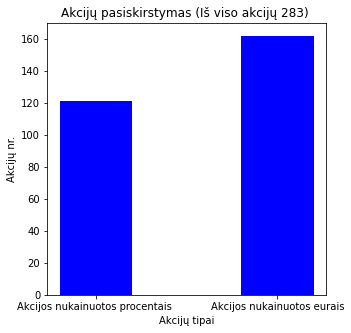

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

#Kiek yra eiluciu
Kiek_yra_akciju = len(df.index)
print("Kiek yra akcijų: ", Kiek_yra_akciju)

#Kiek yra procentiniu akciju
Akcijos_procentais = dfprice['Price'].str.count('%').sum()
print("Kiek yra akcijų kurios nukainuotos procentais: ", Akcijos_procentais)

#Kiek yra paprastu akciju
Akcijos_nukainuotos = Kiek_yra_akciju - Akcijos_procentais
print("Kiek yra akcijų kurios nukainuotos kaina (eurais): ", Akcijos_nukainuotos)

labels = ['Akcijos nukainuotos procentais ', 'Akcijos nukainuotos eurais']


# creating the dataset
data = {'Akcijos nukainuotos procentais ':Akcijos_procentais,
        'Akcijos nukainuotos eurais':Akcijos_nukainuotos}
  
headers = list(data.keys())
akcijos = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(headers, akcijos, color ='blue',
		width = 0.4)

plt.xlabel("Akcijų tipai")
plt.ylabel("Akcijų nr.")
plt.title("Akcijų pasiskirstymas (Iš viso akcijų 283) ")
plt.show()


Procentu pasiskirstymas

In [ ]:
dfpercent = dfprice[dfprice['Price'].str.contains('%')]
print(dfpercent)

    Price
0    -40%
1    -20%
3    -30%
5    -50%
14   -50%
..    ...
276  -40%
277  -30%
278  -25%
279  -30%
280  -30%

[121 rows x 1 columns]


In [ ]:
print(dfpercent["Price"].unique())

['-40%' '-20%' '-30%' '-50%' '-27%' '-51%' '-22%' '-35%' '-23%' '-26%'
 '-31%' '-36%' '-15%' '-25%' '-21%' '-32%' '-43%' '-37%' '-39%' '-41%'
 '-70%']


In [ ]:
bar = dfpercent.Price.value_counts()
bar

-20%    37
-40%    24
-30%    15
-25%    10
-50%     8
-22%     4
-36%     3
-26%     2
-21%     2
-31%     2
-23%     2
-35%     2
-27%     2
-15%     1
-51%     1
-32%     1
-43%     1
-37%     1
-39%     1
-41%     1
-70%     1
Name: Price, dtype: int64

In [ ]:
len(bar)

Top 5 procentu ir kt. bar graph

['-20%', '-40%', '-30%', '-25%', '-50%', 'Kiti']
[37, 24, 15, 10, 8, 27]


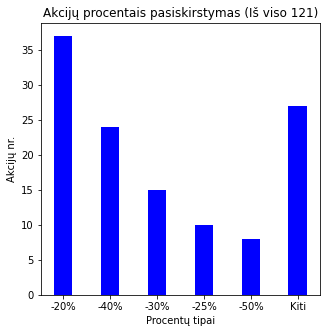

In [ ]:
labels = ['-20%', '-40%', '-30%', '-25%', '-50%', 'Kiti']

other = 0
for i in range(len(bar)-5):
  other+=bar[5+i]

values = [bar[0], bar[1], bar[2], bar[3], bar[4], other]
print(labels)
print(values)

y_pos = np.arange(len(labels))

fig = plt.figure(figsize = (5, 5))

plt.bar(y_pos, values, align='center', color ='blue', width = 0.4)
plt.xticks(y_pos, labels)

plt.xlabel("Procentų tipai")
plt.ylabel("Akcijų nr.")
plt.title("Akcijų procentais pasiskirstymas (Iš viso 121)")

plt.show()
